In [7]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pylab as plt


In [104]:
#For CSV files
inaData = pd.read_csv('ina2192019-08-23-1566572407.csv').fillna(0)

In [105]:
print(inaData.shape)
inaData.head()

(914, 3)


,mA,V,time
0,493.5,4.596,1.566572e+09
1,493.5,4.596,1.566572e+09
2,494.0,4.596,1.566572e+09
3,494.2,4.596,1.566572e+09
4,493.1,4.596,1.566572e+09


In [106]:
#add power
type(inaData)

pandas.core.frame.DataFrame

In [107]:
inaData.insert(2, 'watts', (inaData.mA / 1000.0) * inaData.V, True)

In [108]:
inaData.head()

,mA,V,watts,time
0,493.5,4.596,2.268126,1.566572e+09
1,493.5,4.596,2.268126,1.566572e+09
2,494.0,4.596,2.270424,1.566572e+09
3,494.2,4.596,2.271343,1.566572e+09
4,493.1,4.596,2.266288,1.566572e+09


In [109]:
seleniumData = pd.read_csv('selenium2019-08-23-1566572416.csv').fillna(0)


In [110]:
print(seleniumData.shape)
seleniumData.tail()

(50, 2)


,task,time
45,click,1.566572e+09
46,click,1.566572e+09
47,click,1.566572e+09
48,click,1.566572e+09
49,stop,1.566572e+09


In [111]:
startTime = seleniumData.loc[seleniumData.loc[:,'task']=='start']
stopTime = seleniumData.loc[seleniumData.loc[:,'task']=='stop']

print stopTime.time[49]

1566572457.4729998


In [125]:

#make new data frame with power date from only test duration
inaTestData = inaData.loc[(inaData.loc[:,'time']>=startTime.time[0]) & (inaData.loc[:,'time']<=stopTime.time[49])]
#inaTestData2 = inaTestData.loc[inaTestData.loc[:,'time']<stopTime.time[49]]
inaTestData.shape

(505, 4)

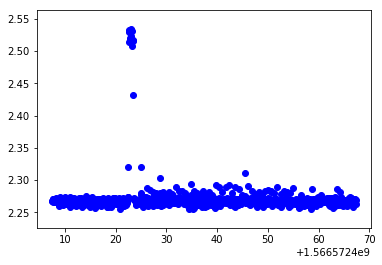

In [126]:
#df = df.rename(index=str, columns={0: "year", 1: "start"})

# a graph of volume of project start dates by year
plt.scatter(x=inaData.loc[:,'time'], y=inaData.loc[:,'watts'], color='b')


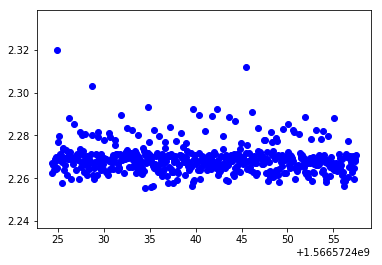

In [127]:
plt.scatter(x=inaTestData.loc[:,'time'], y=inaTestData.loc[:,'watts'], color='b')


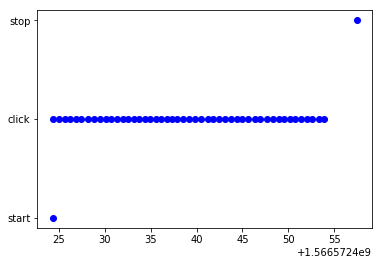

In [128]:

# a graph of volume of project start dates by year
plt.scatter(x=seleniumData.loc[:,'time'], y=seleniumData.loc[:,'task'], color='b')

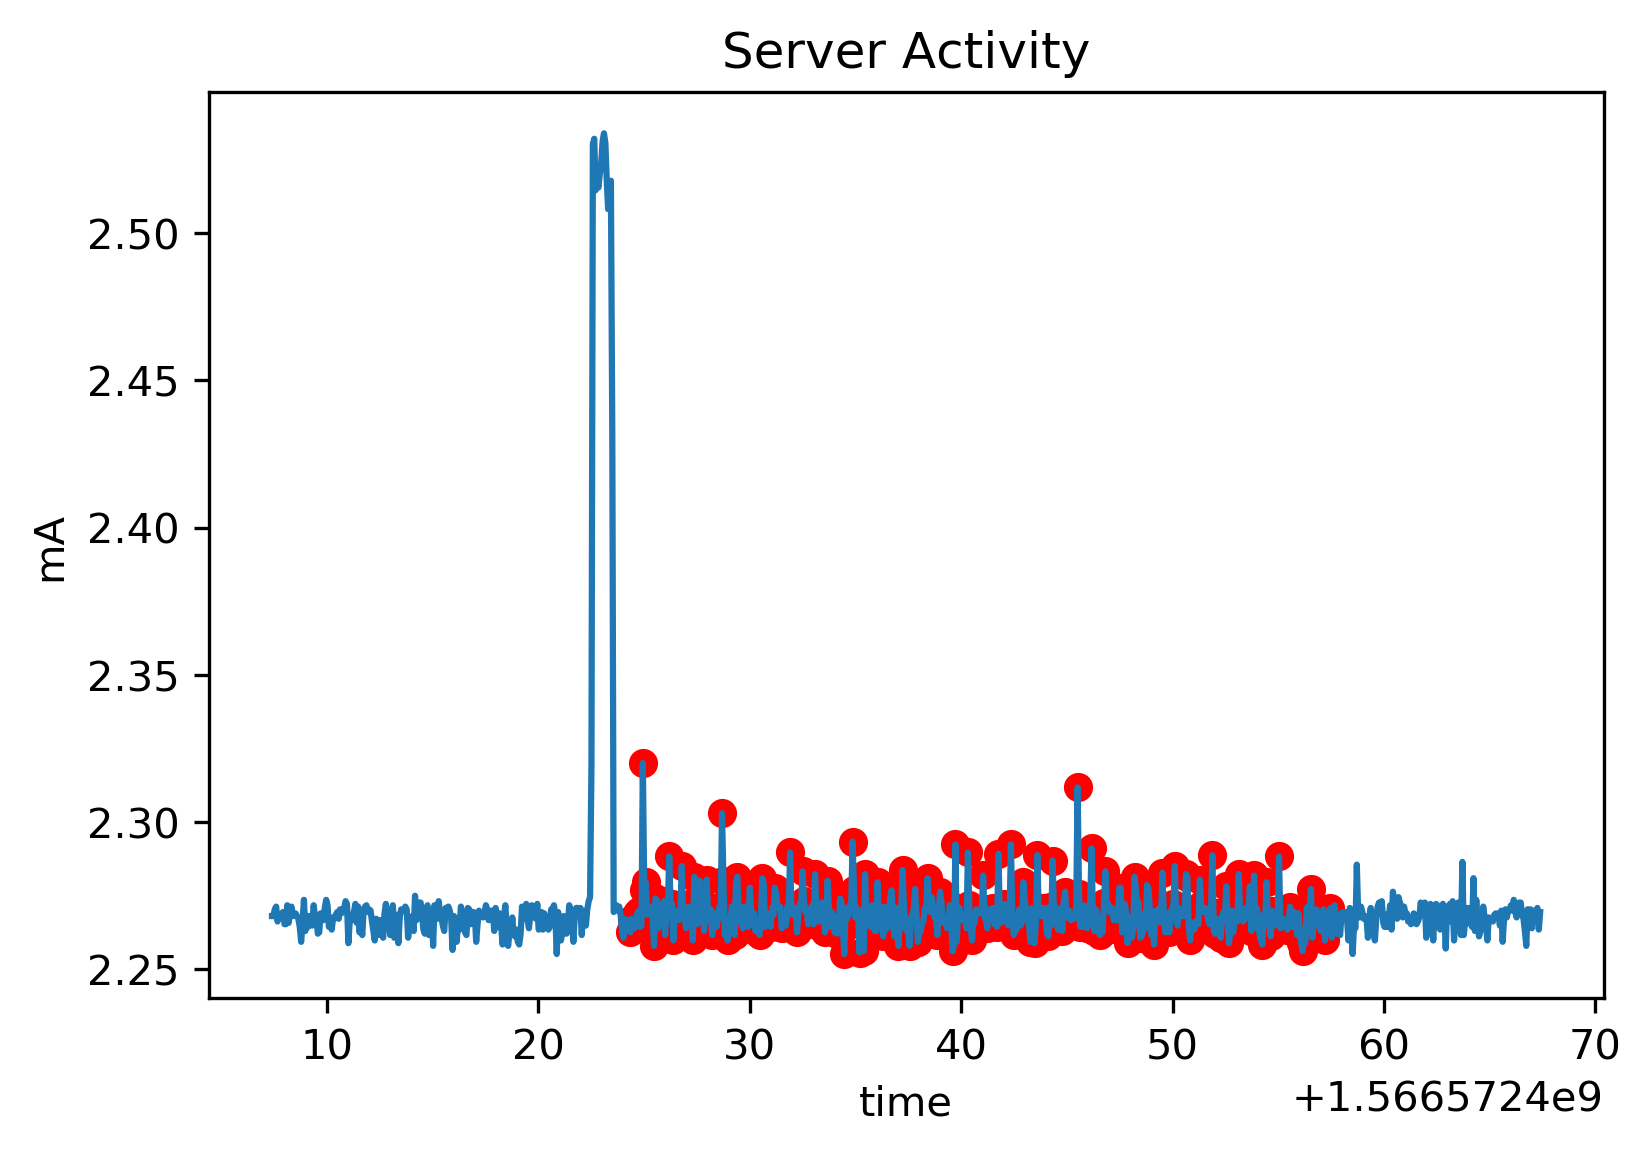

In [129]:
fig, ax = plt.subplots(dpi=300)

x = inaData.loc[:,'time']
y = inaData.loc[:,'watts']
ax.plot(x,y)

ax.set(xlabel='time', ylabel='mA',
       title='Server Activity')

ax.scatter(x=inaTestData.loc[:,'time'], y=inaTestData.loc[:,'watts'], color='r')
#ax.grid()

#fig.savefig("aggregatoroutput_aug23.png")
plt.show()